# NSGA-II experiment

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from deap import creator
from deap import base
from deap import tools
from deap.benchmarks.tools import hypervolume

import nsgaii.price as pr
import nsgaii.toolbox as tb
import nsgaii.search as sr


In [2]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0, -1.0, -1.0))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [3]:
df = pd.read_csv('sample_data.csv', delimiter=',', names=['time','cons', 'pv', 'grid'])
actual = df['cons'].as_matrix()
pv   = df['pv'].as_matrix()

In [4]:
# dimenzionalita problemu, AKA pocet dimenzii
NDIM = 24
BOUND_LOW = 0
BOUND_UP = 10

In [5]:
toolbox = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP)

In [6]:
pop, logbook = sr.search(toolbox, gens=200)

gen	evals	std	min                                                 	avg	max                                                 
0  	200  	   	[  2.30346536e-01   4.64549666e+01   6.92584393e-04]	   	[  5.61841812e-01   1.08392105e+04   4.47348514e+01]
1  	200  	   	[  2.30346536e-01   4.64549666e+01   6.92584393e-04]	   	[  5.72201119e-01   3.40851818e+03   3.91471950e+01]
2  	200  	   	[  2.04510270e-01   4.55129818e+01   6.68499076e-05]	   	[  5.72201119e-01   2.41113280e+03   4.49646320e+01]
3  	200  	   	[  1.96647803e-01   4.28150736e+01   6.68499076e-05]	   	[  6.39089140e-01   4.22501167e+03   4.91331405e+01]
4  	200  	   	[  1.88534484e-01   3.87515076e+01   6.68499076e-05]	   	[  5.31042346e-01   4.22501167e+03   4.75922453e+01]
5  	200  	   	[  1.70847567e-01   3.37437577e+01   6.68499076e-05]	   	[  5.45669910e-01   4.22501167e+03   2.68821202e+01]
6  	200  	   	[  1.45181153e-01   3.37437577e+01   5.57883539e-05]	   	[  6.22638869e-01   4.42547661e+03   3.05263256e+01]
7  	200 

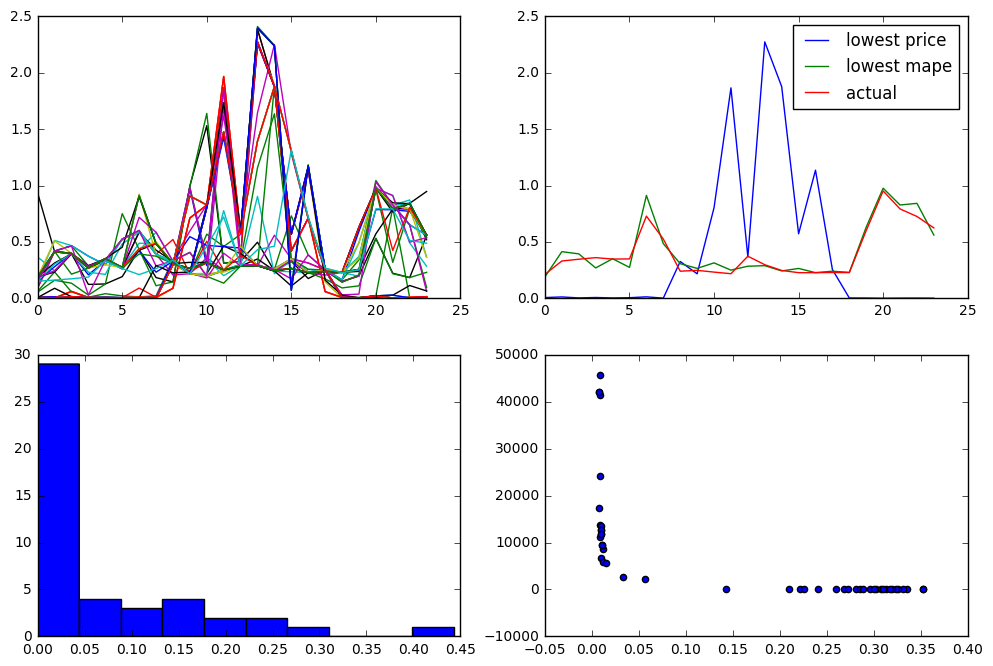

In [10]:
results = np.array([toolbox.evaluate(x) for x in pop])

x = np.hstack([results, pop])
filtered = x[np.where(x[:,2] <= 0.5)[0]]

filtered_pop = filtered[:,3:]
filtered_results = filtered[:,0:3]

lowest_price = filtered_pop[filtered_results[:,0].argmin()]
lowest_mape  = filtered_pop[filtered_results[:,1].argmin()]



fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2,figsize=(12,8))
for solution in filtered_pop:
    ax1.plot(solution)
    
ax2.plot(lowest_price, label='lowest price')
ax2.plot(lowest_mape, label='lowest mape')
ax2.plot(actual, label='actual')
ax2.legend()

ax3.hist(filtered_results[:,2])

ax4.scatter(filtered_results[:,0], filtered_results[:,1])

In [11]:
print(sum(lowest_price), sum(lowest_mape), sum(actual))

9.75400121073 10.0388236591 9.66053333333
